In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from dataset.dataloader import ListDataset
from dataset.augmentations import DefaultAug, NoAug
import torchvision.transforms as transforms

TRANSFORMS = transforms.Compose(
    [
        NoAug(640, True),
    ]
)


def load_classes(path):
    
    """
    Loads class labels at 'path'
    """
    with open(path, "r") as fp:
        names = fp.read().splitlines()
    return names


dataset = ListDataset(
    list_path="./dataset/train.txt", transform=TRANSFORMS)
classes = load_classes("./dataset/coco.names")


def plot_box(index):
    img, boxes = dataset.__getitem__(index=index)
    img = img.transpose((1, 2, 0))  # HWC to CHW

    labels = [classes[int(i)] for i in boxes[:, 0]]
    fig = plt.imshow(img)

    dh, dw, _ = img.shape
    for i, box in enumerate(boxes[:, 1:]):
        x, y, w, h = box[0] * 640, box[1] * 640, box[2] * 640, box[3] * 640
        print("x {}, y {}, w {}, h {}".format(x, y, w, h))
        x1 = int((x - w / 2))
        x2 = int((x + w / 2))
        y1 = int((y - h / 2))
        y2 = int((y + h / 2))
        print("x1 {}, x2 {}, y1 {}, y2 {}".format(x1, x2, y1, y2))
        bbox = plt.Rectangle(xy=(x1, y1), width=w, height=h,
                             fill=False, edgecolor='red', linewidth=2)

        fig.axes.add_patch(bbox)
        fig.axes.text(x1, y1, labels[i],
                      color='white', verticalalignment='top')

    plt.show()
    return None

x 365.18017578125, y 329.0156707763672, w 12.179931640625, h 19.150665283203125
x1 359, x2 371, y1 319, y2 338
x 232.39488220214844, y 318.1164779663086, w 157.29025268554688, h 415.3747100830078
x1 153, x2 311, y1 110, y2 525
x 337.42527770996094, y 312.58815002441406, w 81.26974487304688, h 102.15292358398438
x1 296, x2 378, y1 261, y2 363


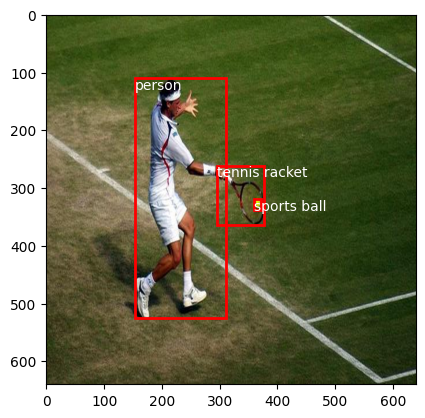

In [2]:
plot_box(29)